In [78]:
import pandas as pd
import datetime
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder

In [79]:
# Read & Merge 2 csv files
df1 = pd.read_csv('stocksData.csv')
df2 = pd.read_csv('stocksInfo.csv')

# Inner Join Merge
# SQL Version: SELECT * FROM df1 INNER JOIN df2 ON df1.Index = df2.Index
data = pd.merge(df1, df2, on='Index', how='inner')
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Region,Exchange,Currency
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,New York Stock Exchange,USD
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,New York Stock Exchange,USD
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,New York Stock Exchange,USD
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,New York Stock Exchange,USD
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,New York Stock Exchange,USD


In [80]:
# Dimensions of dataset
data.shape

(112457, 11)

In [81]:
# Preview dataset
print(data.head(5))
print(data.tail(5))

  Index        Date  ...                 Exchange  Currency
0   NYA  1965-12-31  ...  New York Stock Exchange       USD
1   NYA  1966-01-03  ...  New York Stock Exchange       USD
2   NYA  1966-01-04  ...  New York Stock Exchange       USD
3   NYA  1966-01-05  ...  New York Stock Exchange       USD
4   NYA  1966-01-06  ...  New York Stock Exchange       USD

[5 rows x 11 columns]
       Index        Date         Open  ...  Region  Exchange  Currency
112452  N100  2021-05-27  1241.119995  ...  Europe  Euronext       EUR
112453  N100  2021-05-28  1249.469971  ...  Europe  Euronext       EUR
112454  N100  2021-05-31  1256.079956  ...  Europe  Euronext       EUR
112455  N100  2021-06-01  1254.609985  ...  Europe  Euronext       EUR
112456  N100  2021-06-02  1258.489990  ...  Europe  Euronext       EUR

[5 rows x 11 columns]


In [82]:
# dataset statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [83]:
# Group by 'Index'
print(data.groupby('Index').size())

Index
000001.SS     5963
399001.SZ     5928
GDAXI         8606
GSPTSE       10776
HSI           8750
IXIC         12690
J203.JO       2387
KS11          6181
N100          5507
N225         14500
NSEI          3381
NYA          13948
SSMI          7830
TWII          6010
dtype: int64


In [84]:
# modifying dates to get only 'month' & 'year'
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month

# Dropping 'Date' column
data = data.drop(columns=['Date'])
data.head()

,Index,Open,High,Low,Close,Adj Close,Volume,Region,Exchange,Currency,year,month
0,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,New York Stock Exchange,USD,1965,12
1,NYA,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,New York Stock Exchange,USD,1966,1
2,NYA,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,New York Stock Exchange,USD,1966,1
3,NYA,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,New York Stock Exchange,USD,1966,1
4,NYA,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,New York Stock Exchange,USD,1966,1


In [85]:
# filtering dataset to show only years in 21st century
data = data[data['year'] > 2000]
print(data.groupby('year').size())

year
2001    3106
2002    3114
2003    3114
2004    3124
2005    3081
2006    3006
2007    3053
2008    3259
2009    3243
2010    3251
2011    3243
2012    3467
2013    3477
2014    3492
2015    3497
2016    3501
2017    3491
2018    3487
2019    3461
2020    3493
2021    1414
dtype: int64


In [86]:
# checking for null or na values & dropping them
print(data.isna().any())
data = data.dropna()

# checking for n/a values after drop
print(data.isna().any())

Index        False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
Region       False
Exchange     False
Currency     False
year         False
month        False
dtype: bool
Index        False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
Region       False
Exchange     False
Currency     False
year         False
month        False
dtype: bool


[]

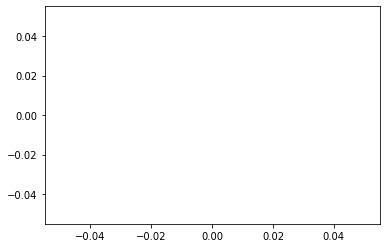

In [87]:
# Showing plot for filtered data

year = data['year']
month = data['month']
plt.plot()